In [3]:
import os
import re
import statistics
from src.najdi_rok import najdi_rok
from src.pocet_stran import pocet_stran
import pandas as pd
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 500)

In [4]:
df = pd.read_parquet(os.path.join("data","cnb_vyber.parquet"))
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))

In [5]:
df = df[df['rok'] >= 1990]

In [6]:
df = df.drop_duplicates(subset=['100_a','245_a'], keep='first')

In [7]:
df = df.dropna(subset=['700_a','700_4','700_7']).explode(['700_a','700_4','700_7'])

In [8]:
df = df[df['700_4'] == 'trl']

In [9]:
df.explode('041_h').groupby('041_h').size().nlargest(20)

041_h
eng    35534
ger    13579
fre     4813
cze     2579
ita     1390
spa     1221
rus     1145
pol     1134
slo     1037
swe      740
lat      602
dut      410
nor      319
jpn      283
chi      263
dan      228
fin      228
grc      211
hun      201
und      186
dtype: int64

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
def create_genre_correlation_matrix(df):
    """
    Create a correlation matrix showing relationships between genres based on shared authors.
    
    Parameters:
    df (pandas.DataFrame): DataFrame with columns '100_7' (author codes) and '072_x' (genres)
    
    Returns:
    pandas.DataFrame: Correlation matrix of genres
    """
    # First, we need to explode the genre lists to get one row per author-genre pair
    df_exploded = df.explode('041_h')
    
    # Create a pivot table where:
    # - Rows are author codes
    # - Columns are genres
    # - Values are 1 if the author writes in that genre, 0 if not
    genre_matrix = pd.crosstab(
        df_exploded['700_7'],
        df_exploded['041_h']
    )
    
    # Calculate the correlation matrix
    correlation_matrix = genre_matrix.corr()
    
    # Round to 2 decimal places for readability
    correlation_matrix = correlation_matrix.round(2)
    
    return correlation_matrix

def plot_correlation_heatmap(correlation_matrix, figsize=(20, 16), cmap='RdBu_r'):
    """
    Create a heatmap visualization of the correlation matrix.
    
    Parameters:
    correlation_matrix (pandas.DataFrame): The correlation matrix to visualize
    figsize (tuple): Figure size in inches (width, height)
    cmap (str): Color map to use (default: 'RdBu_r' for red-blue diverging)
    
    Returns:
    matplotlib.figure.Figure: The generated figure
    """
    # Create figure and axes
    plt.figure(figsize=figsize)
    
    # Create heatmap
    sns.heatmap(
        correlation_matrix,
        annot=True,  # Show correlation values
        cmap=cmap,   # Color scheme
        center=0,    # Center the colormap at 0
        vmin=-1,     # Minimum correlation value
        vmax=1,      # Maximum correlation value
        square=True, # Make cells square
        fmt='.2f',   # Format for correlation values
        cbar_kws={'label': 'Correlation Coefficient'}
    )
    
    # Customize the plot
    plt.title('Ze kterých jazyků překládají stejní lidé', pad=20)
    plt.tight_layout()
    
    return plt.gcf()

def analyze_and_visualize_genres(df, plot_kwargs=None):
    """
    Complete analysis function that creates the correlation matrix and visualizes it.
    
    Parameters:
    df (pandas.DataFrame): Input DataFrame with author and genre information
    plot_kwargs (dict): Optional kwargs for plot customization
    
    Returns:
    tuple: (correlation_matrix, figure)
    """
    # Default plot parameters
    if plot_kwargs is None:
        plot_kwargs = {}
    
    # Create correlation matrix
    corr_matrix = create_genre_correlation_matrix(df)
    
    # Create visualization
    fig = plot_correlation_heatmap(corr_matrix, **plot_kwargs)
    
    return corr_matrix, fig

# Example usage:
"""
# Assuming your DataFrame is called 'df':

# Basic usage
corr_matrix, fig = analyze_and_visualize_genres(df)
plt.show()

# Customized visualization
custom_params = {
    'figsize': (15, 12),
    'cmap': 'viridis'  # Alternative color scheme
}
corr_matrix, fig = analyze_and_visualize_genres(df, plot_kwargs=custom_params)
plt.show()
"""

"\n# Assuming your DataFrame is called 'df':\n\n# Basic usage\ncorr_matrix, fig = analyze_and_visualize_genres(df)\nplt.show()\n\n# Customized visualization\ncustom_params = {\n    'figsize': (15, 12),\n    'cmap': 'viridis'  # Alternative color scheme\n}\ncorr_matrix, fig = analyze_and_visualize_genres(df, plot_kwargs=custom_params)\nplt.show()\n"

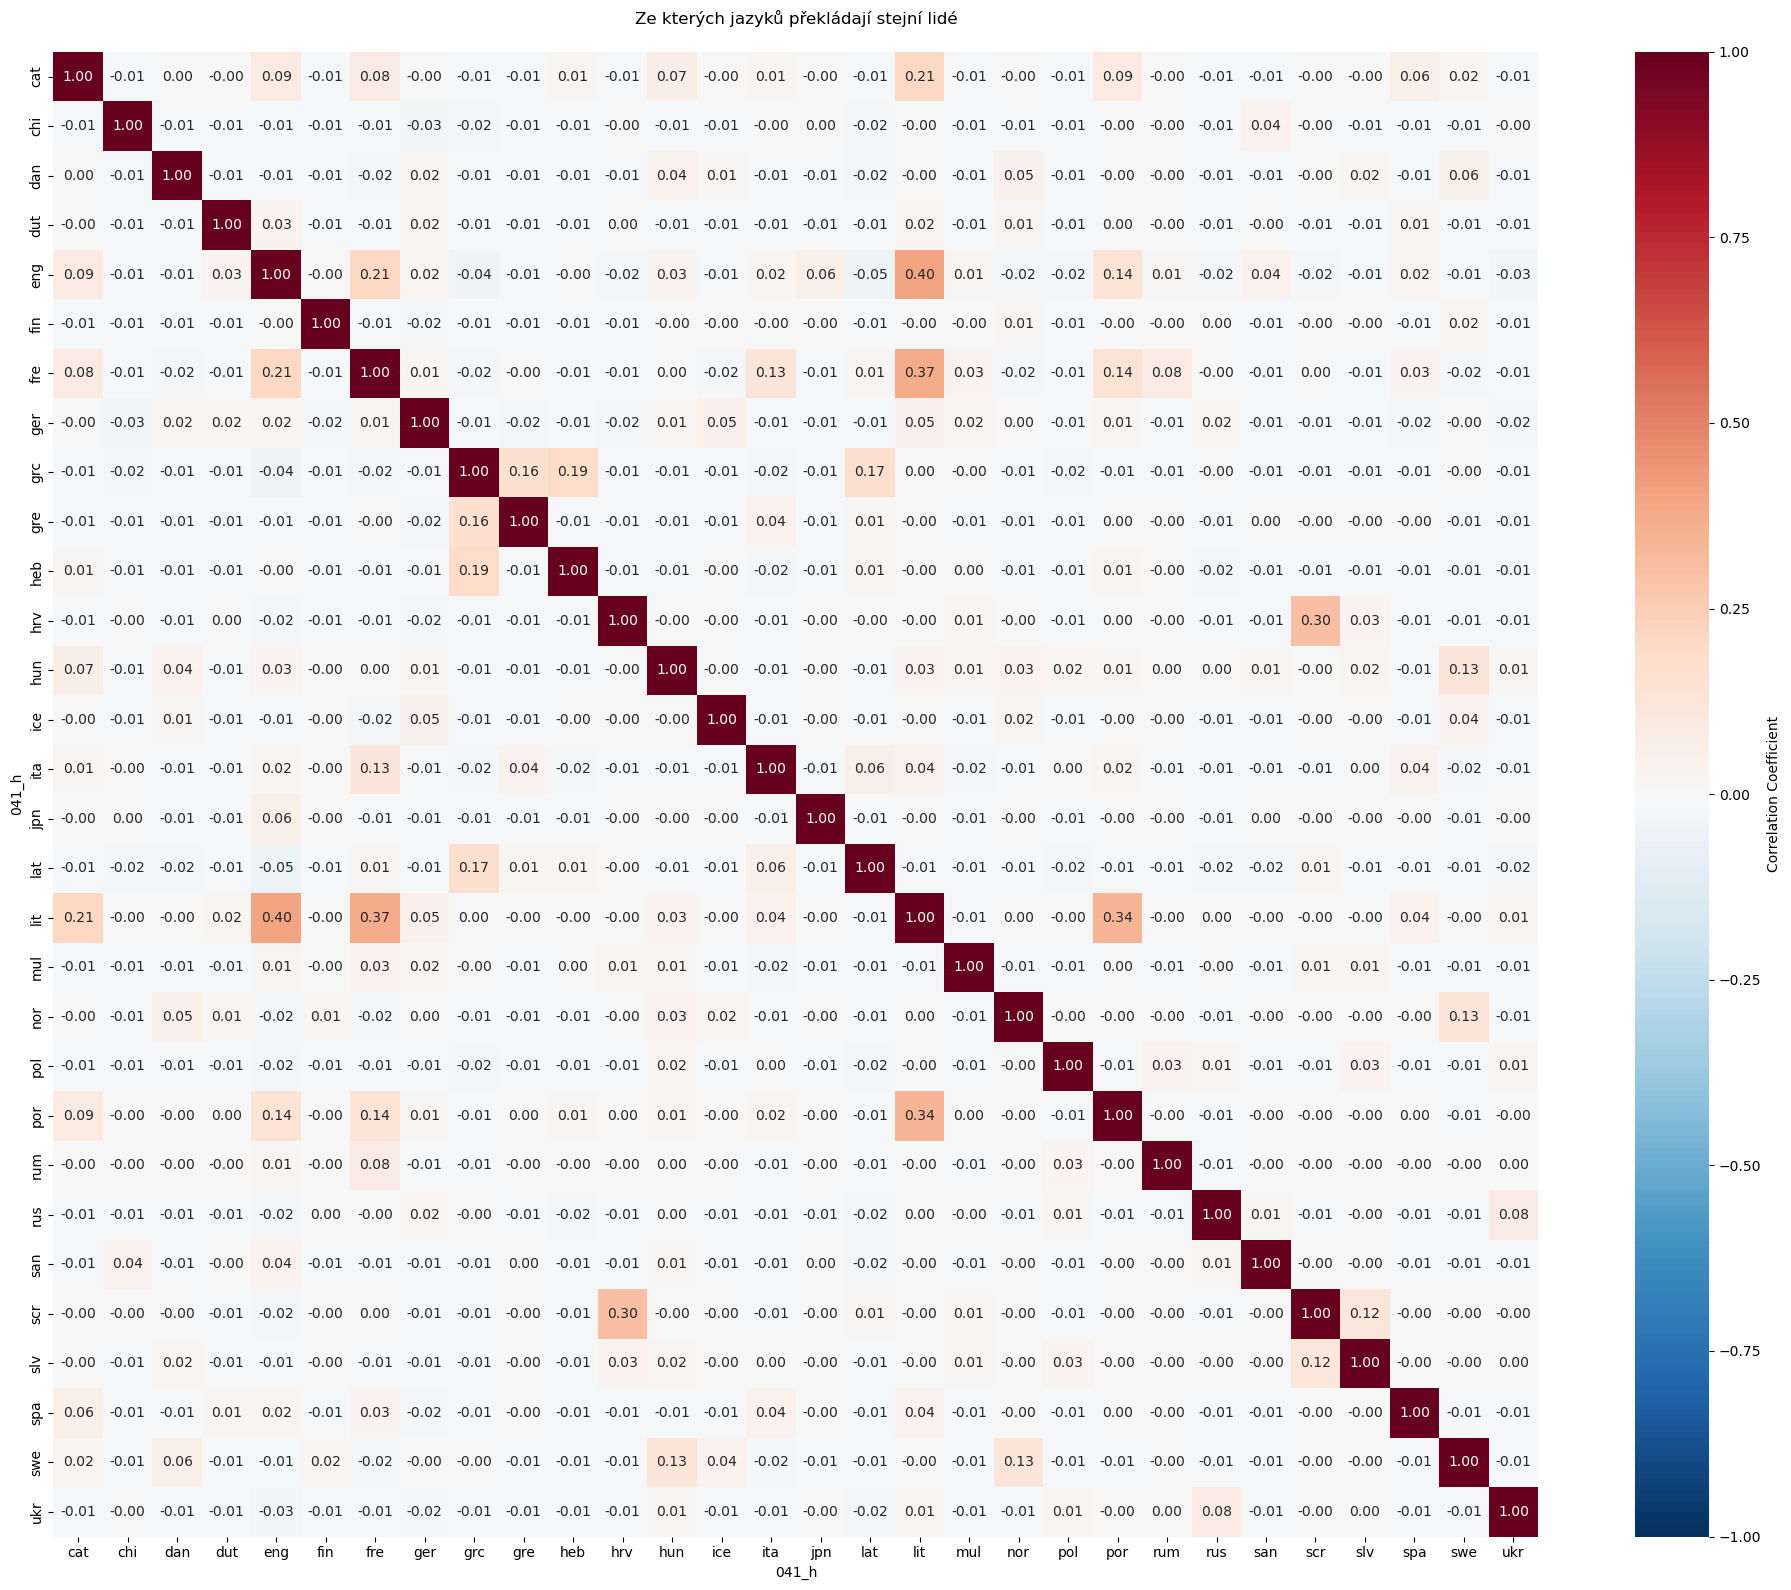

In [12]:
df_expl = df.explode('041_h')
df_filtr = df_expl[~df_expl['041_h'].isin(['cze','und','slo'])]
nejpilnejsi = df_filtr.groupby("700_7")['041_h'].nunique()
nejpilnejsi = nejpilnejsi[nejpilnejsi >= 2].index.to_list()
df_filtr = df_filtr[df_filtr['700_7'].isin(nejpilnejsi)]
nejcastejsi = df_filtr.groupby('041_h').size().nlargest(30).index.to_list()
df_filtr = df_filtr[df_filtr['041_h'].isin(nejcastejsi)]
corr_matrix, fig = analyze_and_visualize_genres(df_filtr)
plt.show()

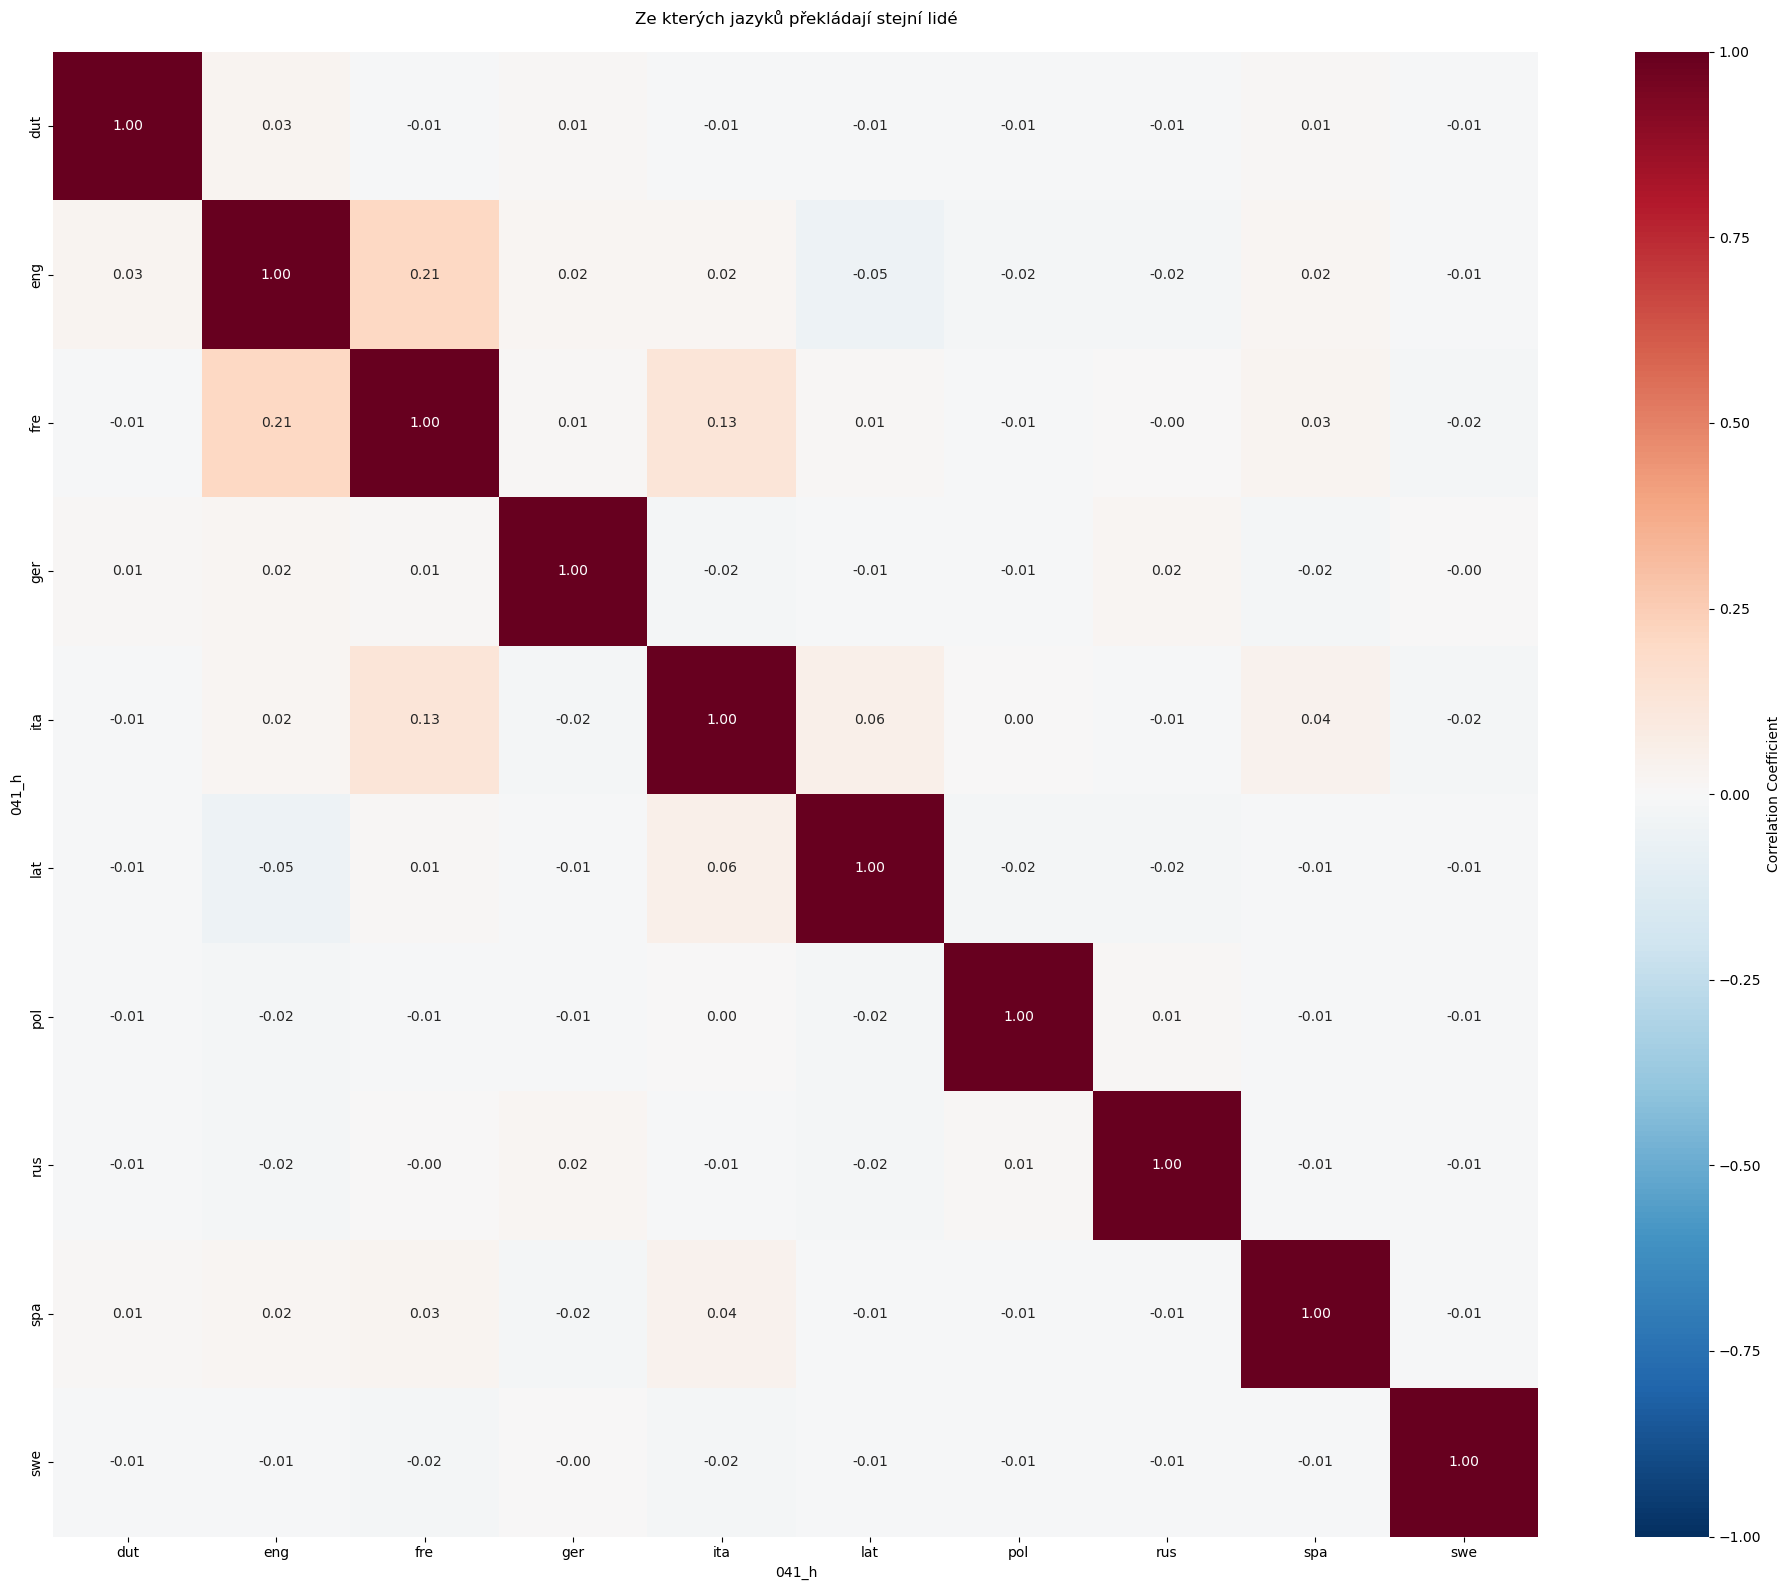

In [13]:
df_expl = df.explode('041_h')
df_filtr = df_expl[~df_expl['041_h'].isin(['cze','und','slo'])]
nejpilnejsi = df_filtr.groupby("700_7")['041_h'].nunique()
nejpilnejsi = nejpilnejsi[nejpilnejsi >= 2].index.to_list()
df_filtr = df_filtr[df_filtr['700_7'].isin(nejpilnejsi)]
nejcastejsi = df_filtr.groupby('041_h').size().nlargest(10).index.to_list()
df_filtr = df_filtr[df_filtr['041_h'].isin(nejcastejsi)]
corr_matrix, fig = analyze_and_visualize_genres(df_filtr)
plt.show()

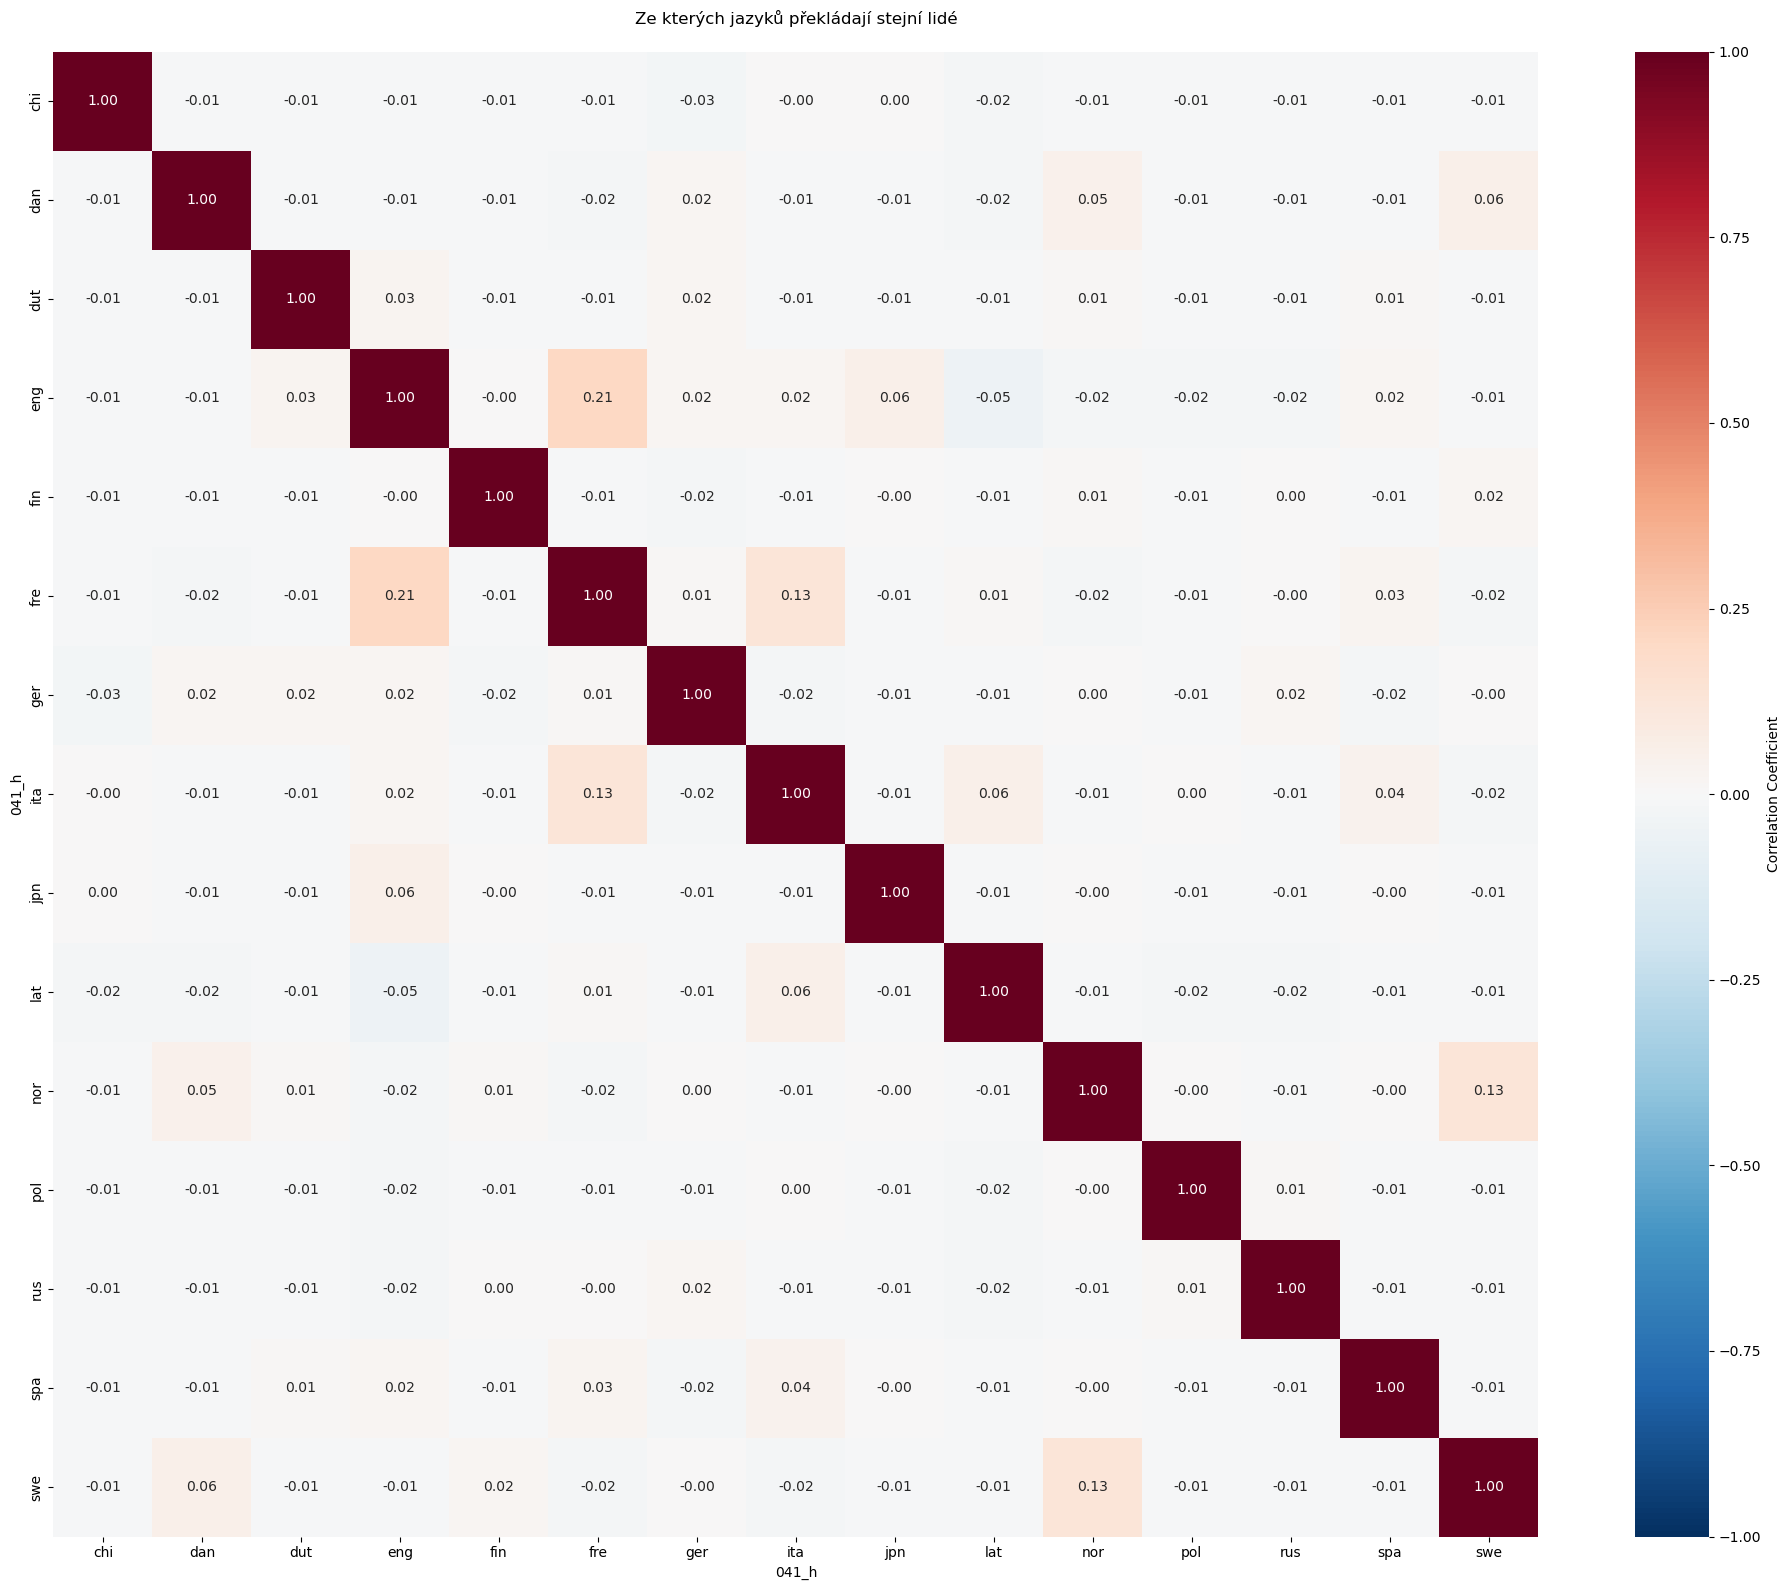

In [14]:
df_filtr = df_expl[~df_expl['041_h'].isin(['cze','und','slo'])]
nejpilnejsi = df_filtr.groupby("700_7")['041_h'].nunique()
nejpilnejsi = nejpilnejsi[nejpilnejsi >= 2].index.to_list()
df_filtr = df_filtr[df_filtr['700_7'].isin(nejpilnejsi)]
nejcastejsi = df_filtr.groupby('041_h').size().nlargest(15).index.to_list()
df_filtr = df_filtr[df_filtr['041_h'].isin(nejcastejsi)]
corr_matrix, fig = analyze_and_visualize_genres(df_filtr)
plt.show()

In [88]:
df_tab = df_expl[~df_expl['041_h'].isin(['cze','und','slo'])]
nejpilnejsi = df_tab.groupby("700_7")['041_h'].nunique()
nejpilnejsi = nejpilnejsi[nejpilnejsi >= 2].index.to_list()
df_tab = df_tab[df_tab['700_7'].isin(nejpilnejsi)]
nejcastejsi = df_tab.groupby('041_h').size().nlargest(40).index.to_list()
df_tab = df_tab[df_tab['041_h'].isin(nejcastejsi)]
vysledky = create_genre_correlation_matrix(df_tab)
jazyky = vysledky.columns.to_list()
vysledky = vysledky.reset_index().rename(columns={"041_h": "jazyk"})
vysledky

041_h,jazyk,ara,arc,bul,cat,chi,dan,dut,eng,fin,fre,ger,grc,gre,heb,hrv,hun,ice,ita,jpn,kor,lat,lit,mul,non,nor,per,pol,por,rum,rus,san,scr,sla,slv,spa,srp,swe,tib,ukr,wen
0,ara,1.00,0.02,-0.00,-0.01,-0.01,-0.01,-0.01,0.01,-0.01,-0.01,-0.01,0.02,-0.01,0.07,-0.01,-0.01,-0.01,-0.02,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.01,0.04,-0.01,-0.00,-0.00,-0.01,-0.01,-0.00,-0.01,-0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.00
1,arc,0.02,1.00,-0.00,-0.01,-0.01,-0.01,-0.01,-0.00,-0.01,-0.01,-0.00,0.39,-0.01,0.31,-0.01,-0.01,-0.01,-0.02,-0.01,-0.00,0.02,-0.00,0.04,-0.00,-0.01,-0.01,-0.01,-0.00,-0.00,-0.01,0.03,-0.00,-0.01,-0.00,-0.01,-0.01,0.00,-0.01,-0.01,-0.00
2,bul,-0.00,-0.00,1.00,-0.00,-0.01,-0.00,-0.01,-0.01,-0.00,-0.01,0.03,-0.01,-0.00,-0.01,0.10,-0.00,-0.00,-0.01,-0.00,-0.00,-0.01,-0.00,0.03,-0.00,-0.00,-0.00,0.03,-0.00,-0.00,0.02,-0.00,0.04,-0.00,0.03,-0.01,0.07,-0.00,-0.00,-0.00,-0.00
3,cat,-0.01,-0.01,-0.00,1.00,-0.01,0.00,-0.00,0.09,-0.01,0.08,-0.00,-0.01,-0.01,0.01,-0.01,0.07,-0.00,0.01,-0.00,-0.00,-0.01,0.21,-0.01,-0.00,-0.00,-0.01,-0.01,0.09,-0.00,-0.01,-0.01,-0.00,-0.01,-0.00,0.06,-0.01,0.02,-0.01,-0.01,-0.00
4,chi,-0.01,-0.01,-0.01,-0.01,1.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.03,-0.02,-0.01,-0.01,-0.00,-0.01,-0.01,-0.00,0.00,0.05,-0.02,-0.00,-0.01,-0.01,-0.01,-0.00,-0.01,-0.00,-0.00,-0.01,0.04,-0.00,-0.00,-0.01,-0.01,-0.01,-0.01,0.07,-0.00,-0.00
5,dan,-0.01,-0.01,-0.00,0.00,-0.01,1.00,-0.01,-0.01,-0.01,-0.02,0.02,-0.01,-0.01,-0.01,-0.01,0.04,0.01,-0.01,-0.01,-0.00,-0.02,-0.00,-0.01,0.03,0.05,0.01,-0.01,-0.00,-0.00,-0.01,-0.01,-0.00,-0.01,0.02,-0.01,-0.01,0.06,0.00,-0.01,-0.00
6,dut,-0.01,-0.01,-0.01,-0.00,-0.01,-0.01,1.00,0.03,-0.01,-0.01,0.02,-0.01,-0.01,-0.01,0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,0.02,-0.01,-0.01,0.01,-0.01,-0.01,0.00,-0.00,-0.01,-0.00,-0.01,-0.00,-0.01,0.01,-0.01,-0.01,-0.01,-0.01,-0.00
7,eng,0.01,-0.00,-0.01,0.09,-0.01,-0.01,0.03,1.00,-0.00,0.21,0.02,-0.04,-0.01,-0.00,-0.01,0.03,-0.01,0.02,0.06,0.00,-0.05,0.40,0.01,-0.02,-0.02,-0.02,-0.02,0.14,0.01,-0.02,0.04,-0.02,-0.02,-0.01,0.02,-0.03,-0.01,-0.01,-0.03,-0.01
8,fin,-0.01,-0.01,-0.00,-0.01,-0.01,-0.01,-0.01,-0.00,1.00,-0.01,-0.02,-0.01,-0.01,-0.01,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,0.01,-0.01,-0.01,-0.00,-0.00,0.00,-0.01,-0.00,-0.01,-0.00,-0.01,-0.01,0.02,-0.01,-0.01,-0.00
9,fre,-0.01,-0.01,-0.01,0.08,-0.01,-0.02,-0.01,0.21,-0.01,1.00,0.01,-0.02,-0.00,-0.01,-0.01,0.00,-0.01,0.13,-0.01,-0.01,0.01,0.37,0.03,-0.01,-0.02,-0.01,-0.01,0.14,0.08,-0.00,-0.01,0.00,-0.02,-0.01,0.03,-0.01,-0.02,-0.01,-0.01,-0.01


In [90]:
vysledky = vysledky.melt(id_vars="jazyk", value_vars=jazyky)
vysledky = vysledky[vysledky['jazyk'] != vysledky['041_h']]

In [86]:
df_expl[df_expl['041_h'] == 'lit']

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpk19980601497,981207s1998 xr e 000 p cze,[80-901739-6-9],"[Kč 89,00]",[(brož.) :],[cze],lit,1,None,[821.17],[Baltské literatury],"[821.172-1, 821.174, 398, (474.5), (474.3), (0...",None,None,None,None,None,V kruhu krásy :,"[uspořádal, úvodní studií opatřil a přeložil R...",None,None,None,[1. vyd.],None,[Praha :],"[Bohemika,]",[1998],None,None,None,None,None,None,None,[132 s. ;],None,[21 cm],[Dějiny literatur Pobaltí],None,[Na přebásnění několika ukázek v litevské část...,None,None,None,"[lotyšská poezie, litevská poezie, lidová poez...",None,None,"[None, None, Litva, Lotyšsko]",None,None,"[poezie, antologie]",trl,jk01052335,"Kabíček, Jaroslav,","[1931-1996, None, 1920-2019]",None,None,None,None,[Dějiny literatur Pobaltí],None,None,nam a22 a 4500,1998.0
cpk19980601497,981207s1998 xr e 000 p cze,[80-901739-6-9],"[Kč 89,00]",[(brož.) :],[cze],lit,1,None,[821.17],[Baltské literatury],"[821.172-1, 821.174, 398, (474.5), (474.3), (0...",None,None,None,None,None,V kruhu krásy :,"[uspořádal, úvodní studií opatřil a přeložil R...",None,None,None,[1. vyd.],None,[Praha :],"[Bohemika,]",[1998],None,None,None,None,None,None,None,[132 s. ;],None,[21 cm],[Dějiny literatur Pobaltí],None,[Na přebásnění několika ukázek v litevské část...,None,None,None,"[lotyšská poezie, litevská poezie, lidová poez...",None,None,"[None, None, Litva, Lotyšsko]",None,None,"[poezie, antologie]",trl,None,"Váňová, Dagmar","[1931-1996, None, 1920-2019]",None,None,None,None,[Dějiny literatur Pobaltí],None,None,nam a22 a 4500,1998.0
cpk19980601497,981207s1998 xr e 000 p cze,[80-901739-6-9],"[Kč 89,00]",[(brož.) :],[cze],lit,1,None,[821.17],[Baltské literatury],"[821.172-1, 821.174, 398, (474.5), (474.3), (0...",None,None,None,None,None,V kruhu krásy :,"[uspořádal, úvodní studií opatřil a přeložil R...",None,None,None,[1. vyd.],None,[Praha :],"[Bohemika,]",[1998],None,None,None,None,None,None,None,[132 s. ;],None,[21 cm],[Dějiny literatur Pobaltí],None,[Na přebásnění několika ukázek v litevské část...,None,None,None,"[lotyšská poezie, litevská poezie, lidová poez...",None,None,"[None, None, Litva, Lotyšsko]",None,None,"[poezie, antologie]",trl,jk01091773,"Parolek, Radegast,","[1931-1996, None, 1920-2019]",None,None,None,None,[Dějiny literatur Pobaltí],None,None,nam a22 a 4500,1998.0
nkc20091998237,091130s2009 xr a g 000 m cze,[978-80-904443-0-0],"[Kč 90,00]",[(brož.) :],[cze],lit,1,None,[821],[Literatura v různých jazycích],"[821(474), 821-1, 821-3, (0:82-1), (0:82-3), (...",[aut],xx0049614,"Langa, Liāna,",1960-,None,Baltskou cestou :,"[Liāna Langa, Kęstutis Navakas, Arvo Valton ; ...",None,None,None,[Vyd. 1.],None,[Praha :],"[Skandinávský dům,]",[2009],None,None,None,None,None,None,None,[52 s. :],[il. ;],[21 cm],None,None,"[Přeloženo z estonštiny, litevštiny a lotyštin...",None,None,[20.-21. století],"[pobaltské literatury, Baltic states literatures]",None,"[20.-21. století, 20th-21st centuries]",None,None,None,"[poezie, prózy, sborníky, poetry, proses, misc...",trl,jn19990218007,"Borkovec, Petr,","[1964-, 1935-2024, 1984-, 1970-, None]",None,None,None,None,None,None,None,nam a22 a 4500,2009.0
nkc20122427433,121120s2012 xr a g 000 p cze,[978-80-7443-045-9],None,[(brož.)],[cze],lit,1,None,[821.17],[Baltské literatury],"[821.172-1, (0:82-1)]",[aut],mzk2005289679,"Abrutytė, Neringa,",1972-,None,Nerinžina emka a jiné básně /,Neringa Abrutytė ; [z litevských originálů pře...,None,None,None,[Vyd. 1.],None,[Brno :],"[Větrné mlýny,]",[2012],None,None,None,None,None,None,None,[110 s. :],[barev. il. ;],[17 cm],None,None,None,None,None,None,

In [94]:
litevcaci = df_expl[df_expl['041_h'] == 'lit']['700_a'].to_list()
anglicaci =  df_expl[df_expl['041_h'] == 'eng']['700_a'].to_list()
[l for l in litevcaci if l in anglicaci]

['Schwarzová, Karolína,',
 'Schwarzová, Karolína,',
 'Schwarzová, Karolína,',
 'Schwarzová, Karolína,',
 'Vyskočil, Josef',
 'Vyskočil, Josef',
 'Vyskočil, Josef',
 'Vyskočil, Josef',
 'Vyskočil, Josef',
 'Vyskočil, Josef',
 'Vyskočil, Josef',
 'Vyskočil, Josef',
 'Vyskočil, Josef',
 'Vyskočil, Josef',
 'Vyskočil, Josef',
 'Vyskočil, Josef',
 'Vyskočil, Josef',
 'Vyskočil, Josef',
 'Vyskočil, Josef',
 'Vlasák, Lukáš,',
 'Vlasák, Lukáš,',
 'Vyskočil, Josef',
 'Vyskočil, Josef',
 'Vyskočil, Josef',
 'Pádecká, Tereza',
 'Sedláčková, Anna,',
 'Sedláčková, Anna,',
 'Vlčková, Alena,']

In [92]:
vysledky.sort_values(by="value",ascending=False).head(50)

,jazyk,041_h,value
1414,hrv,srp,0.44
595,srp,hrv,0.44
301,lit,eng,0.40
847,eng,lit,0.40
441,arc,grc,0.39
51,grc,arc,0.39
849,fre,lit,0.37
381,lit,fre,0.37
1275,srp,scr,0.37
1431,scr,srp,0.37


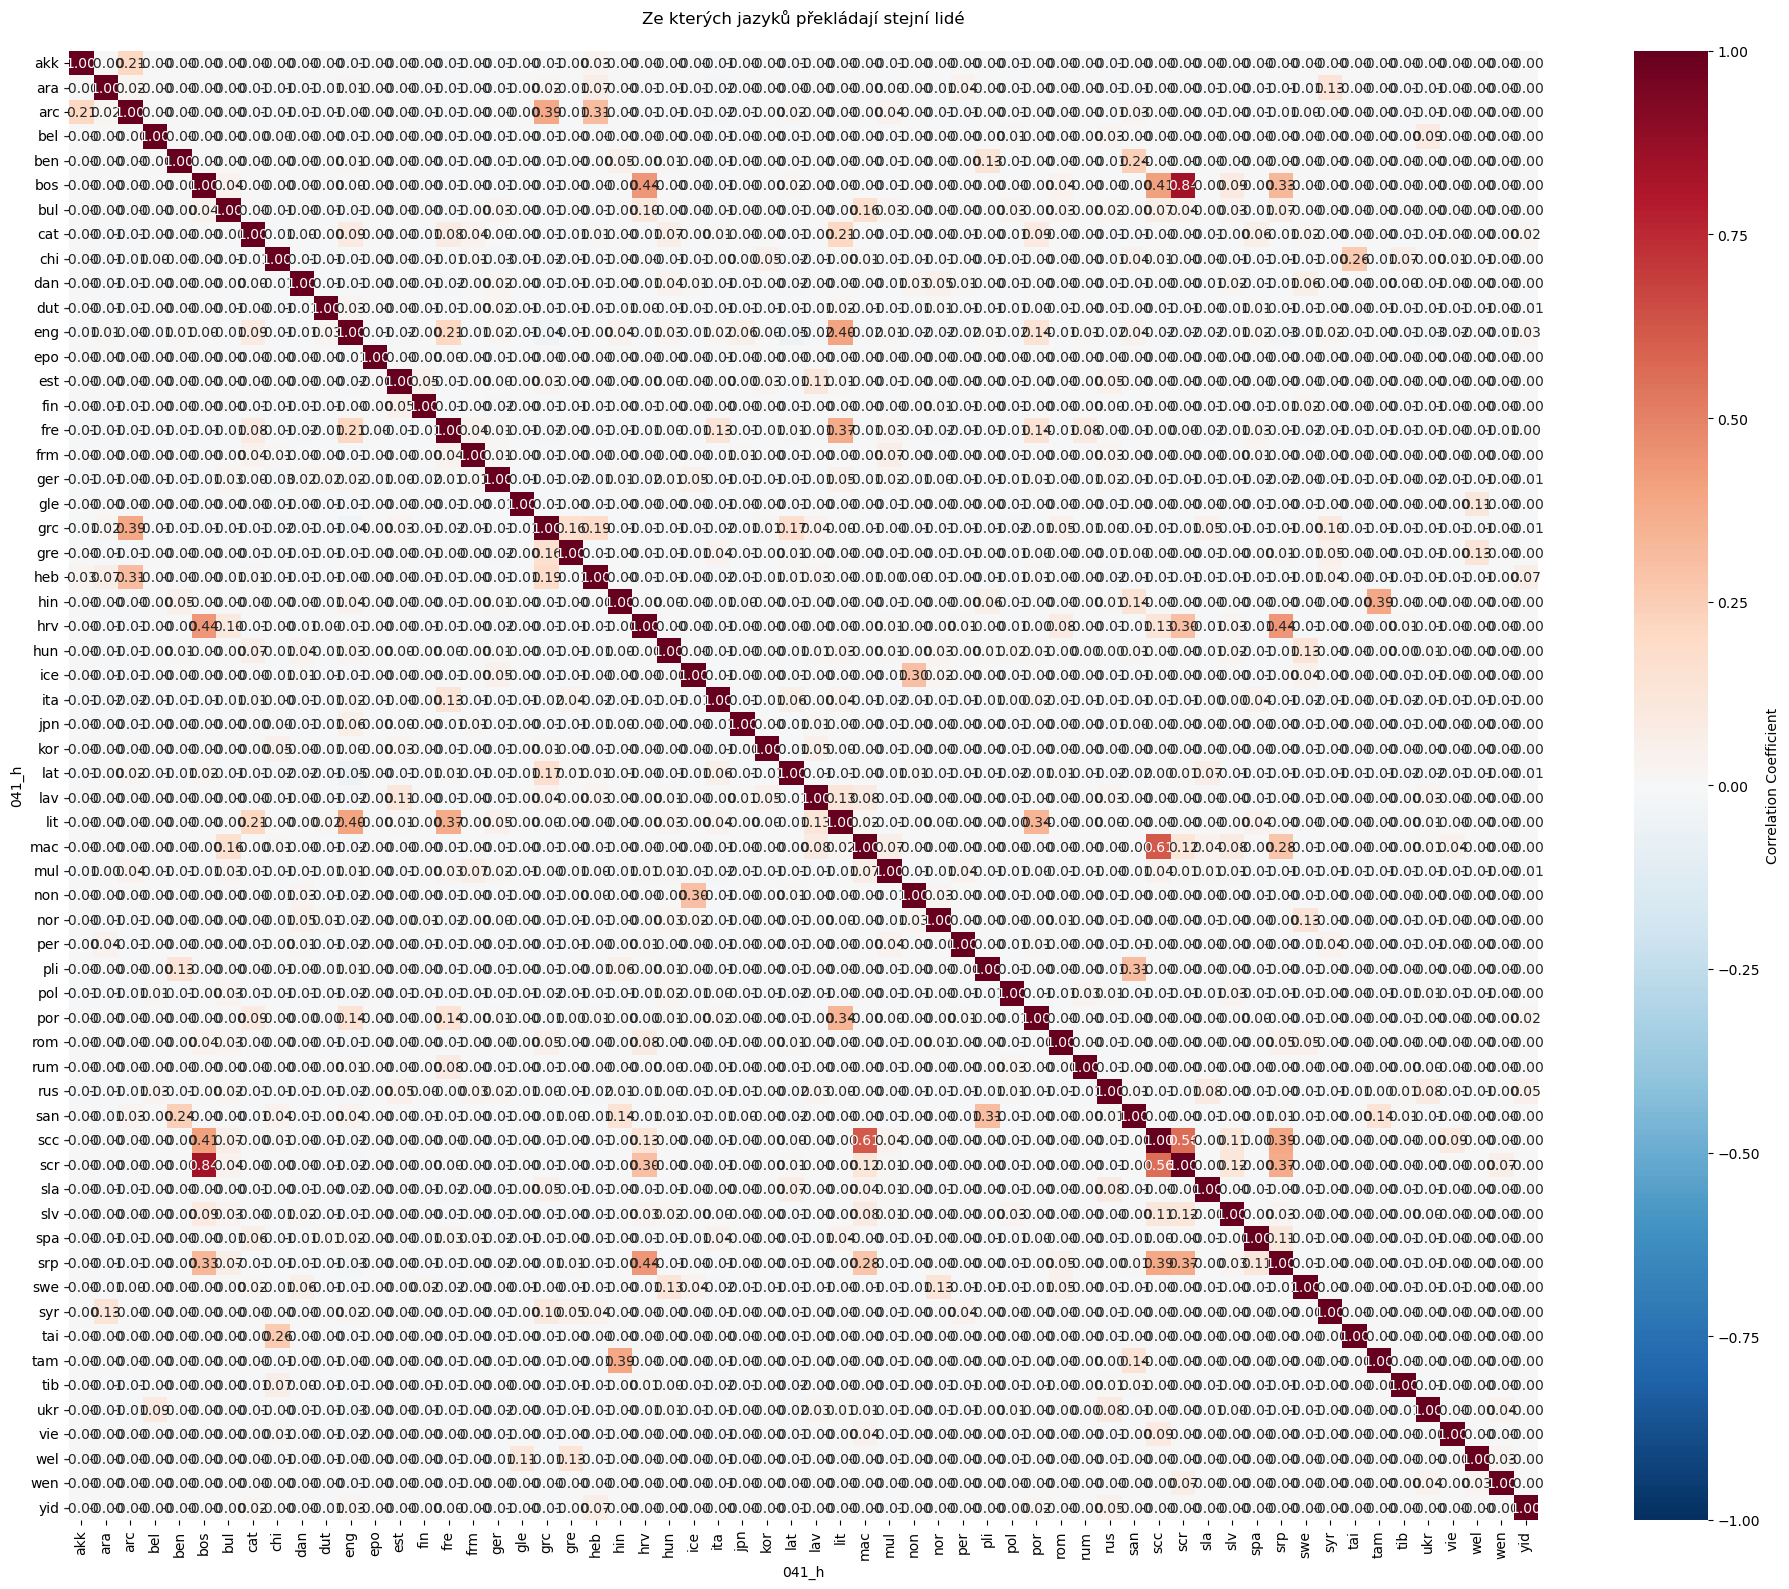

In [17]:
df_filtr = df_expl[~df_expl['041_h'].isin(['cze','und','slo'])]
nejpilnejsi = df_filtr.groupby("700_7")['041_h'].nunique()
nejpilnejsi = nejpilnejsi[nejpilnejsi >= 2].index.to_list()
df_filtr = df_filtr[df_filtr['700_7'].isin(nejpilnejsi)]
nejcastejsi = df_filtr.groupby('041_h').size().nlargest(60).index.to_list()
df_filtr = df_filtr[df_filtr['041_h'].isin(nejcastejsi)]
corr_matrix, fig = analyze_and_visualize_genres(df_filtr)
plt.show()

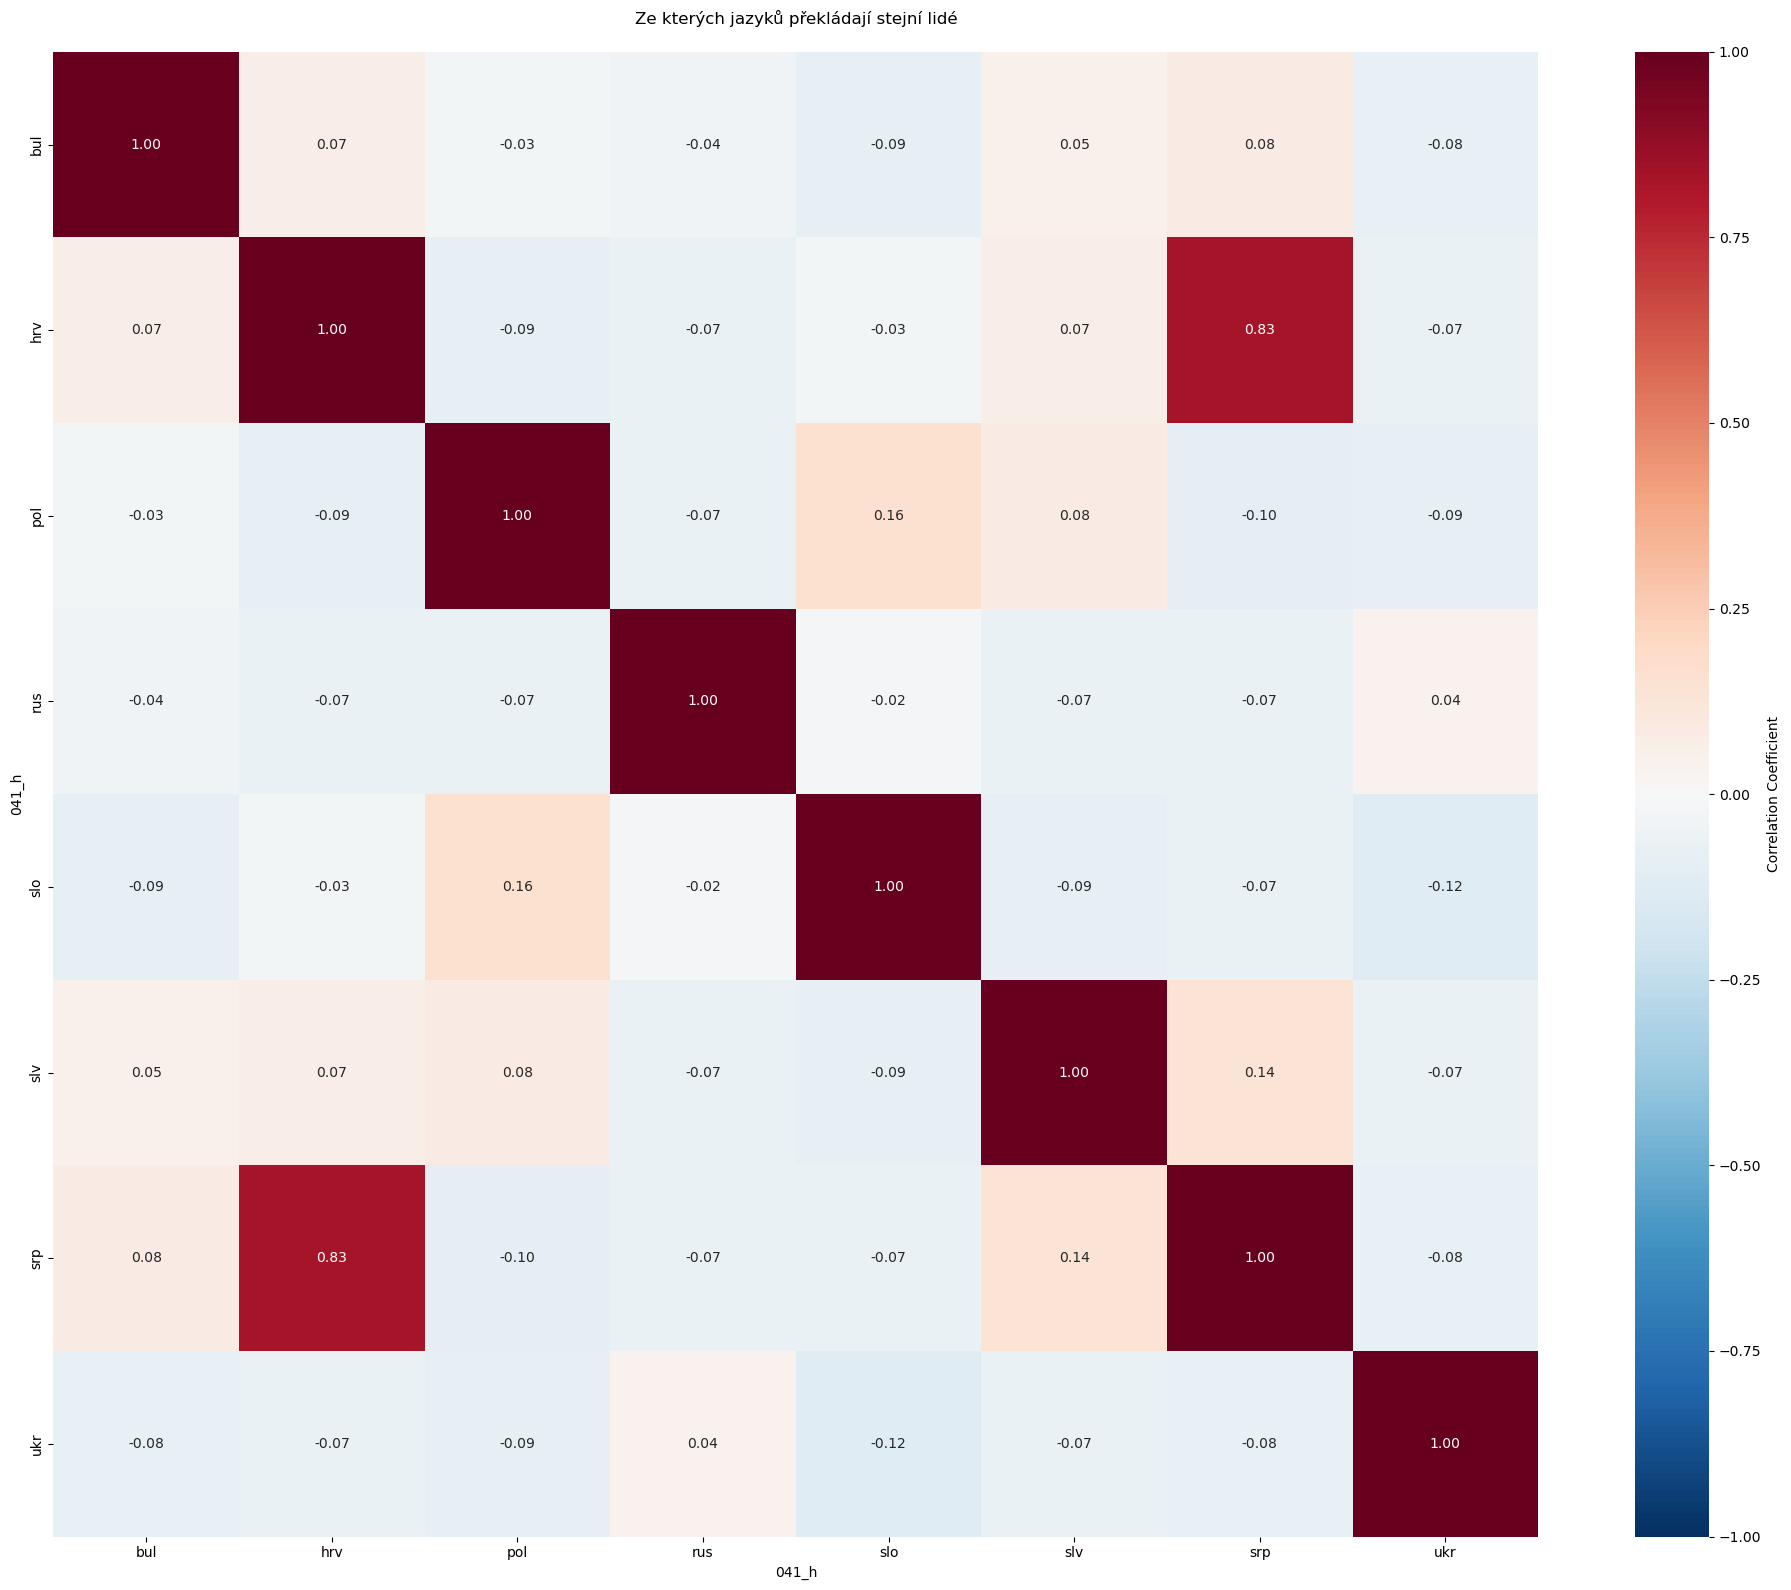

In [18]:
df_filtr = df_expl[df_expl['041_h'].isin(['rus','ukr','pol','slo','slv','srp','hrv','bul'])]
nejpilnejsi = df_filtr.groupby("700_7")['041_h'].nunique()
nejpilnejsi = nejpilnejsi[nejpilnejsi >= 2].index.to_list()
df_filtr = df_filtr[df_filtr['700_7'].isin(nejpilnejsi)]
nejcastejsi = df_filtr.groupby('041_h').size().nlargest(40).index.to_list()
df_filtr = df_filtr[df_filtr['041_h'].isin(nejcastejsi)]
corr_matrix, fig = analyze_and_visualize_genres(df_filtr)
plt.show()